## Import modules


In [3]:
import pandas as pd
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

 ## Data Summarization

In [4]:
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))
sys.path.append(os.path.abspath('../scripts'))

In [5]:
from scripts.Data_loader import load_data
from scripts.Data_visualization import plot_numerical_distributions, plot_categorical_distributions, calculate_variability_with_plot, explore_correlations, detect_outliers_boxplots

In [6]:
car_insu = load_data(r'C:\Users\fikad\Desktop\10acedamy\CarInsurance-Data-Analysis\Data\insurance_data.csv')
car_insu

,Unnamed: 0,Province,Zipcode,Gender,Total_Claim,Premium
0,0,C,1003,Female,652.740226,898.493109
1,1,A,1003,Female,1159.389368,1040.563548
2,2,C,1003,Male,729.641413,1137.593249
3,3,C,1003,Female,253.524198,764.332164
4,4,A,1001,Male,938.056933,1349.828367
...,...,...,...,...,...,...
995,995,B,1001,Female,1099.492601,1115.364997
996,996,B,1003,Female,877.886857,1250.101777
997,997,C,1002,Female,776.679394,1090.145906
998,998,C,1003,Male,649.706237,1109.161280


### Dataset Information


In [7]:
car_insu.columns

Index(['Unnamed: 0', 'Province', 'Zipcode', 'Gender', 'Total_Claim',
       'Premium'],
      dtype='object')

DROP UNNACESSERY COLUMN

In [8]:
car_insu = car_insu.drop(columns=['Unnamed: 0'])
car_insu

,Province,Zipcode,Gender,Total_Claim,Premium
0,C,1003,Female,652.740226,898.493109
1,A,1003,Female,1159.389368,1040.563548
2,C,1003,Male,729.641413,1137.593249
3,C,1003,Female,253.524198,764.332164
4,A,1001,Male,938.056933,1349.828367
...,...,...,...,...,...
995,B,1001,Female,1099.492601,1115.364997
996,B,1003,Female,877.886857,1250.101777
997,C,1002,Female,776.679394,1090.145906
998,C,1003,Male,649.706237,1109.161280


In [9]:
car_insu.columns

Index(['Province', 'Zipcode', 'Gender', 'Total_Claim', 'Premium'], dtype='object')

In [10]:
car_insu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Province     1000 non-null   object 
 1   Zipcode      1000 non-null   int64  
 2   Gender       1000 non-null   object 
 3   Total_Claim  1000 non-null   float64
 4   Premium      1000 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 39.2+ KB


### Descriptive Statistics: Calculate summary statistics for numerical features

In [11]:
car_insu.describe

<bound method NDFrame.describe of     Province  Zipcode  Gender  Total_Claim      Premium
0          C     1003  Female   652.740226   898.493109
1          A     1003  Female  1159.389368  1040.563548
2          C     1003    Male   729.641413  1137.593249
3          C     1003  Female   253.524198   764.332164
4          A     1001    Male   938.056933  1349.828367
..       ...      ...     ...          ...          ...
995        B     1001  Female  1099.492601  1115.364997
996        B     1003  Female   877.886857  1250.101777
997        C     1002  Female   776.679394  1090.145906
998        C     1003    Male   649.706237  1109.161280
999        A     1003    Male   910.801967  1174.281476

[1000 rows x 5 columns]>

### Data Structure: Review the data types of each column

In [12]:
car_insu.dtypes

Province        object
Zipcode          int64
Gender          object
Total_Claim    float64
Premium        float64
dtype: object

### Data Quality Assessment: Check for missing values

In [13]:
print(car_insu.isnull().sum())

Province       0
Zipcode        0
Gender         0
Total_Claim    0
Premium        0
dtype: int64


### Exploratory Data Analysis (EDA) analysis

### Data Summarization

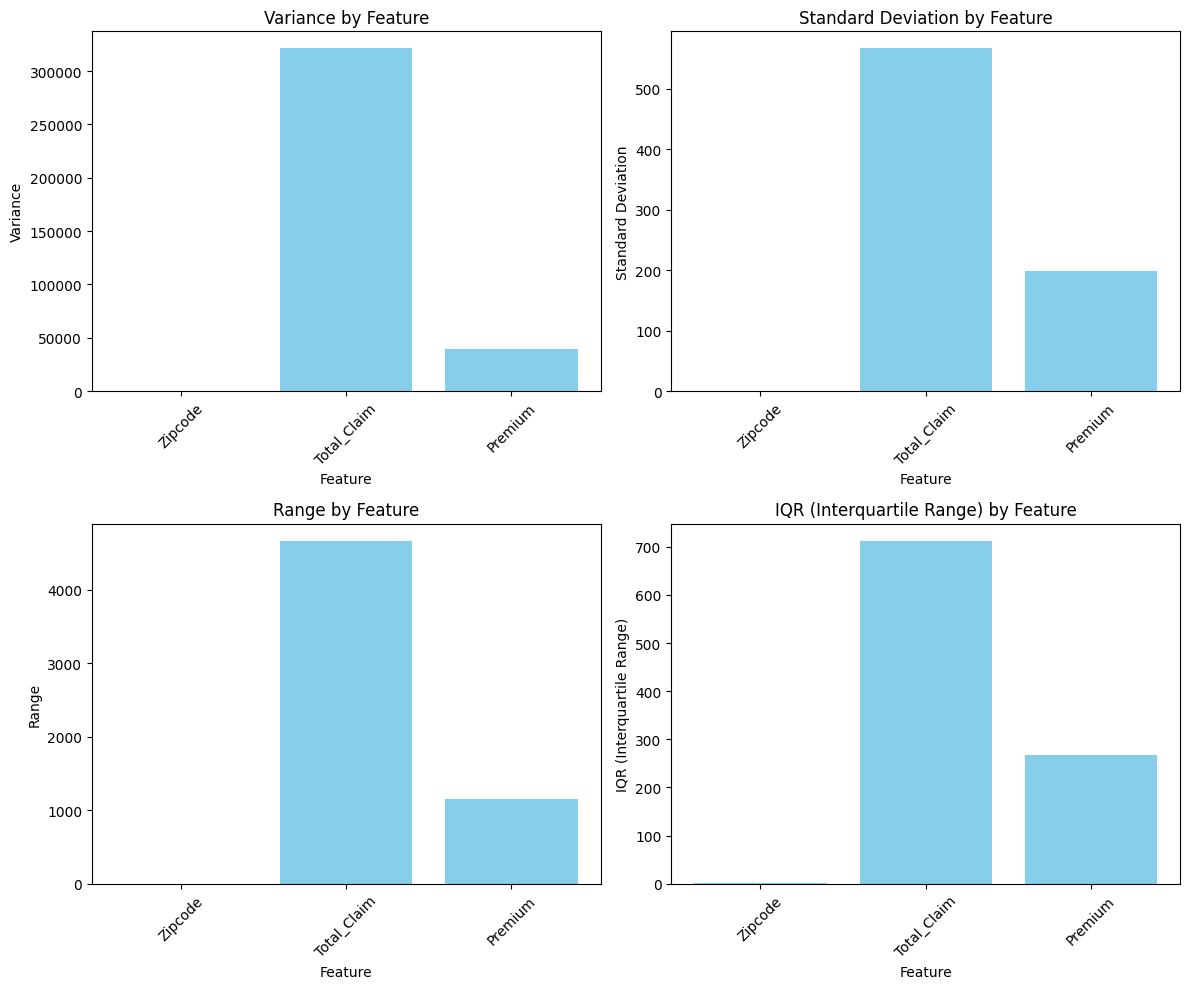

Variability Metrics:
       Feature       Variance  Standard Deviation        Range  \
0      Zipcode       0.667667            0.817109     2.000000   
1  Total_Claim  321126.035939          566.679835  4664.354495   
2      Premium   39310.808308          198.269534  1156.775741   

   IQR (Interquartile Range)  
0                   2.000000  
1                 712.191278  
2                 267.881419  


In [14]:
# Calculate variability and plot
variability_df = calculate_variability_with_plot(car_insu)
# Display the variability metrics
print("Variability Metrics:")
print(variability_df)

### Univariate Analysis:

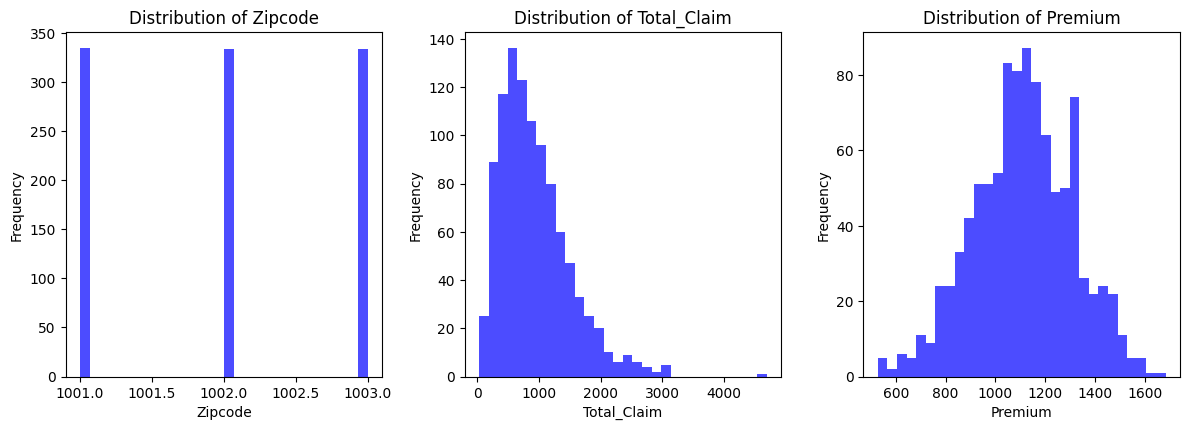

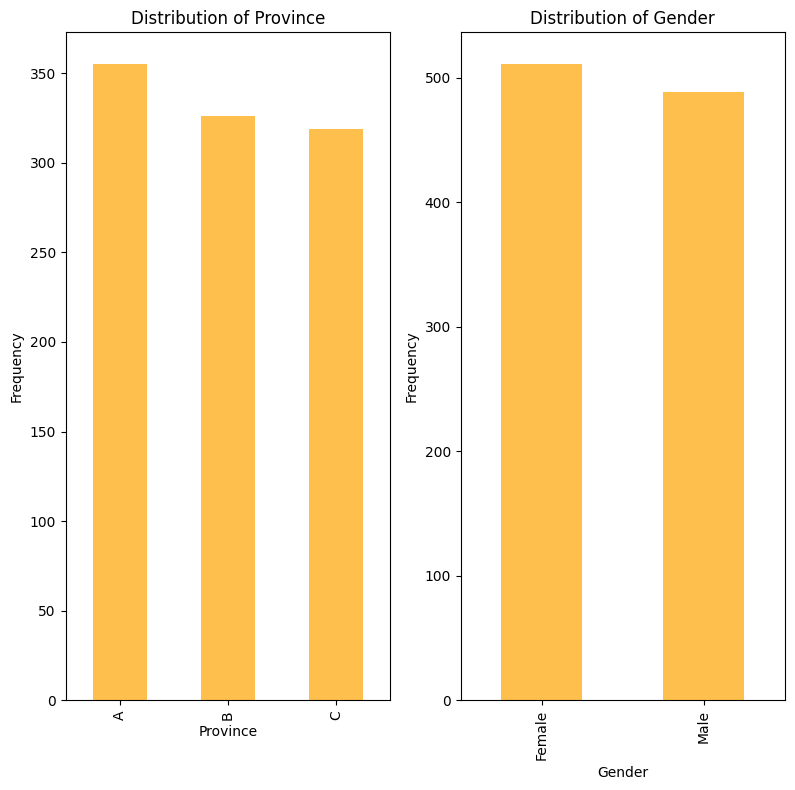

In [15]:
numerical_columns = car_insu.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = car_insu.select_dtypes(include=['object']).columns
        
        # Call functions to plot
plot_numerical_distributions(car_insu, numerical_columns)
plot_categorical_distributions(car_insu, categorical_columns)     


### Bivariate or Multivariate Analysis

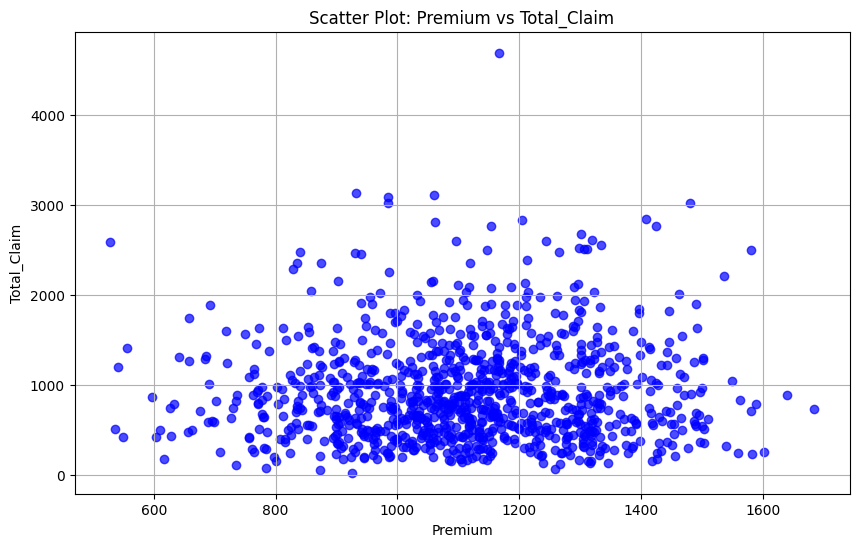

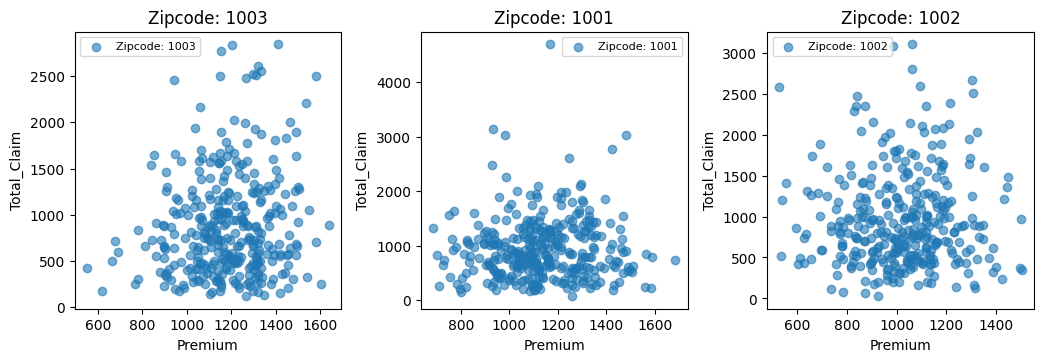

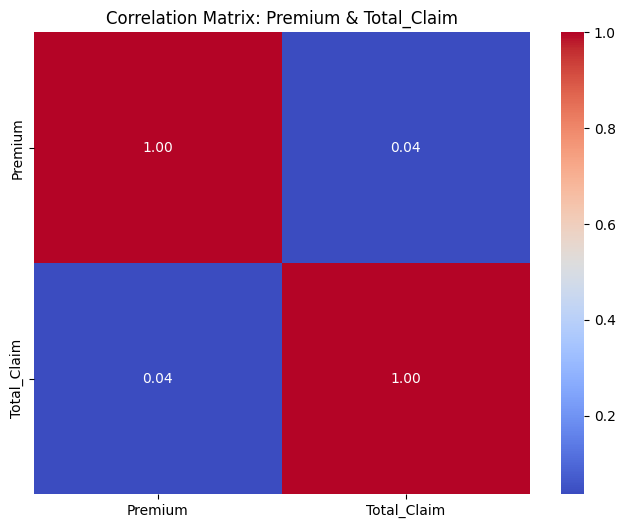

Correlation Matrix:
              Premium  Total_Claim
Premium      1.000000     0.036142
Total_Claim  0.036142     1.000000


In [16]:

# Perform correlation analysis and plot
correlation_matrix = explore_correlations(car_insu, x_feature='Premium', y_feature='Total_Claim', group_feature='Zipcode')

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


### Boxplot before and after boxplot detection

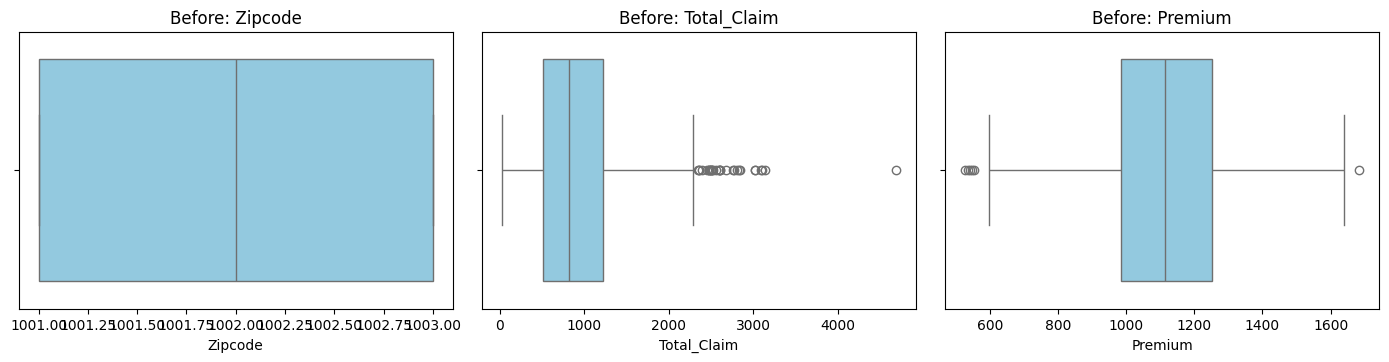

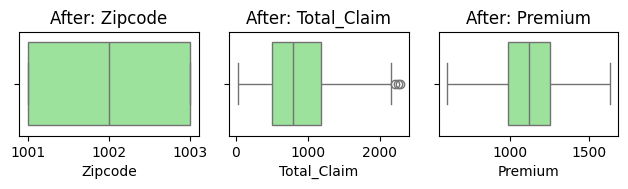

In [17]:
detect_outliers_boxplots(car_insu)

C:\Users\fikad\AppData\Local\Temp\ipykernel_19132\4067292350.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Premium', data=data, palette='Set2')


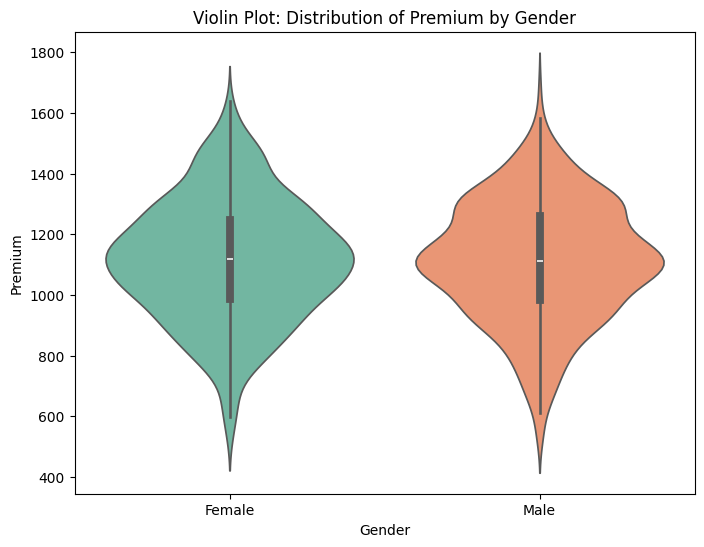

In [18]:
def plot_violin_premium_by_gender(data):
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Gender', y='Premium', data=data, palette='Set2')
    plt.title('Violin Plot: Distribution of Premium by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Premium')
    plt.show()

plot_violin_premium_by_gender(car_insu)


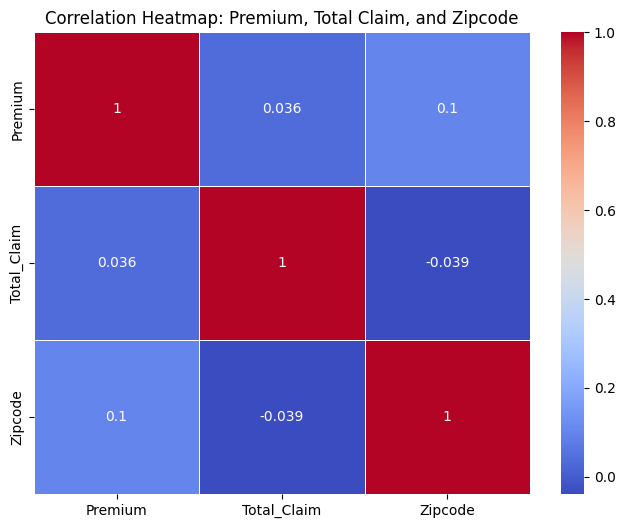

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_heatmap(data):
    # Selecting relevant numerical columns for correlation
    correlation_data = data[['Premium', 'Total_Claim', 'Zipcode']]
    
    # Compute the correlation matrix
    correlation_matrix = correlation_data.corr()
    
    # Plotting the correlation heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap: Premium, Total Claim, and Zipcode')
    plt.show()

plot_correlation_heatmap(car_insu)


C:\Users\fikad\AppData\Local\Temp\ipykernel_19132\826841670.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Zipcode', y='Premium', data=data, palette='coolwarm')


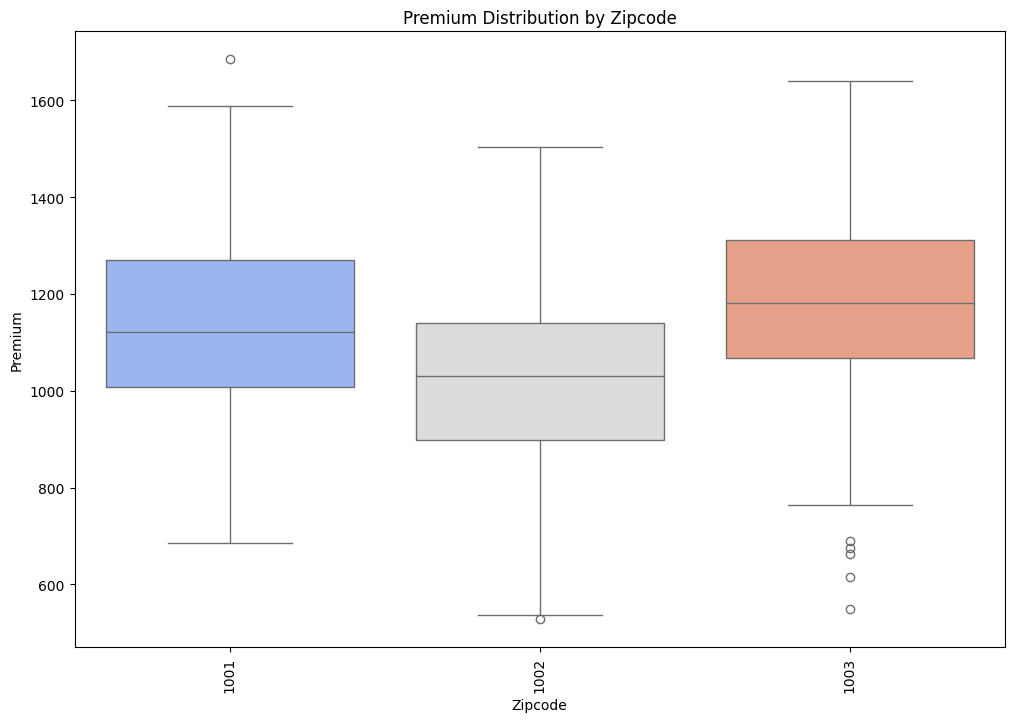

In [20]:
def plot_premium_by_zipcode(data):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Zipcode', y='Premium', data=data, palette='coolwarm')
    plt.title('Premium Distribution by Zipcode')
    plt.xlabel('Zipcode')
    plt.ylabel('Premium')
    plt.xticks(rotation=90)
    plt.show()

plot_premium_by_zipcode(car_insu)
